### Strategic Analysis and Forecasting the Nickel Price using Deep Learning (LSTM)
#### *Dr. Harry Patria (Chief Data Strategist at Patria & Co.)*

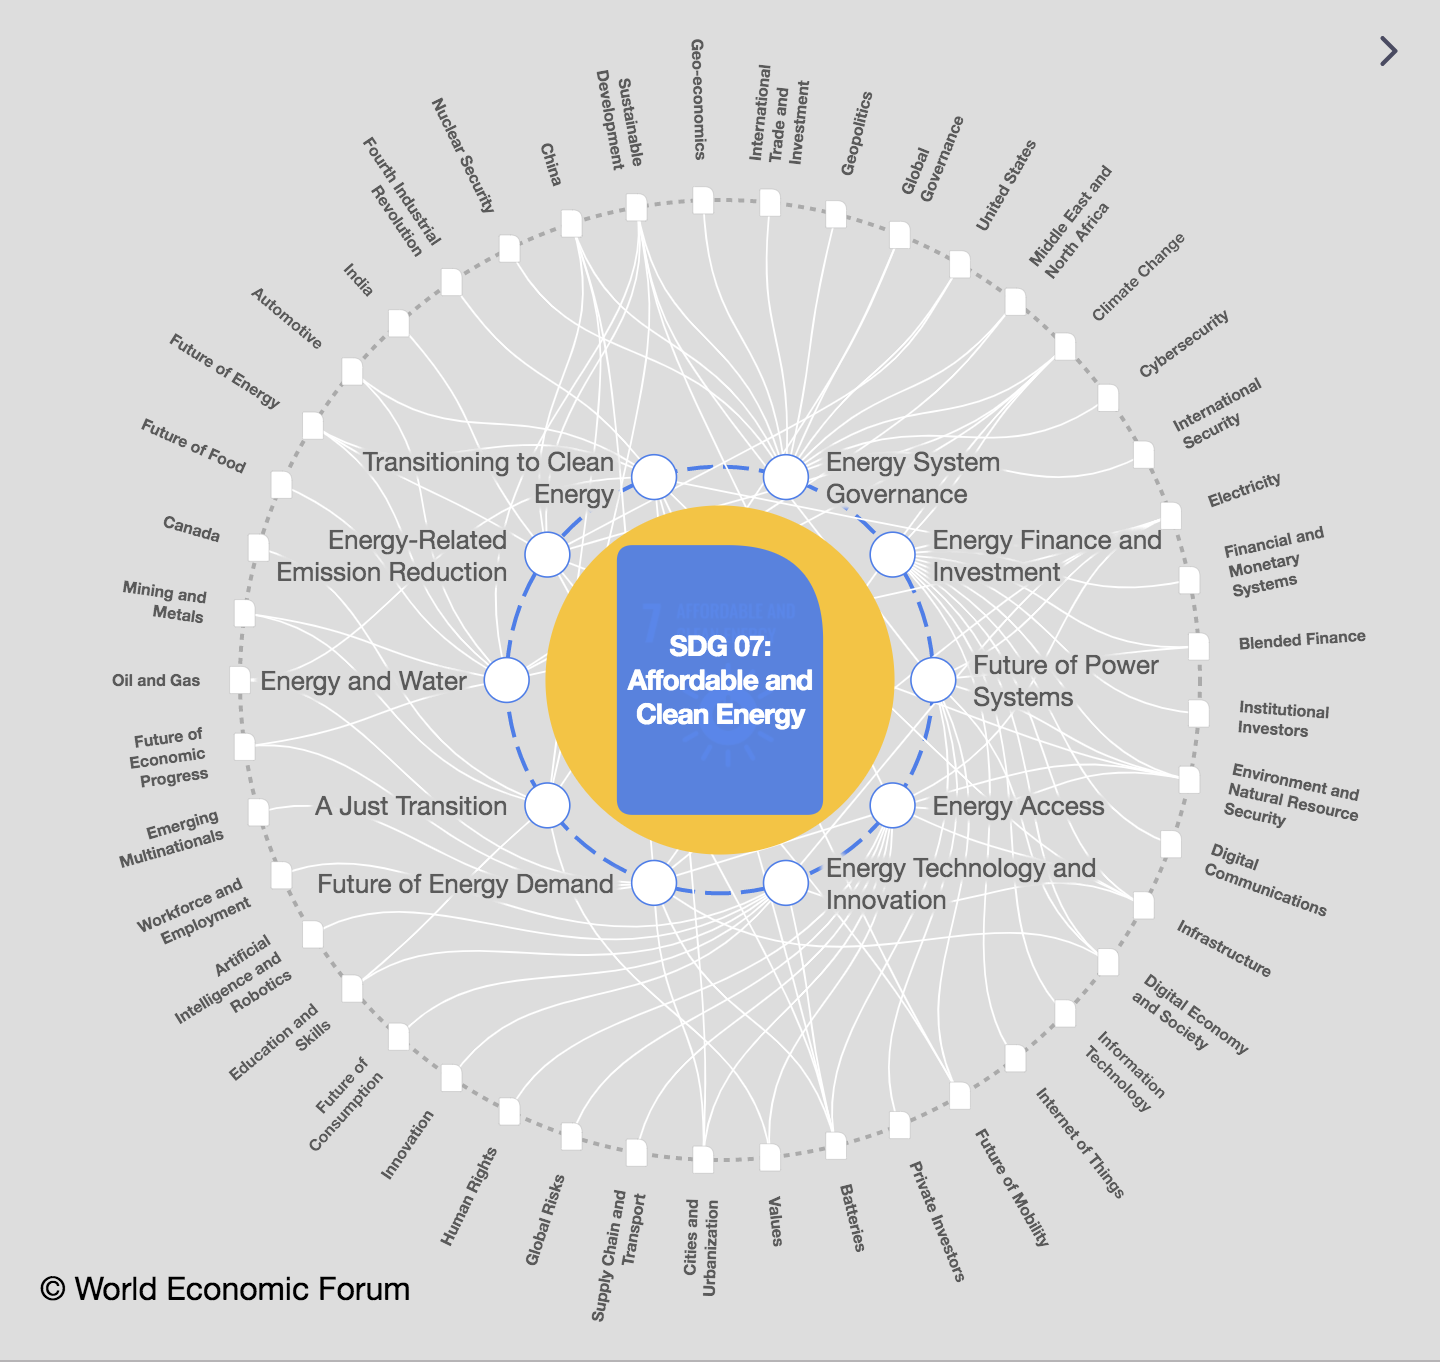

In [1]:
from IPython import display
display.Image("/Users/Harry Patria/Pictures/WEF.png")

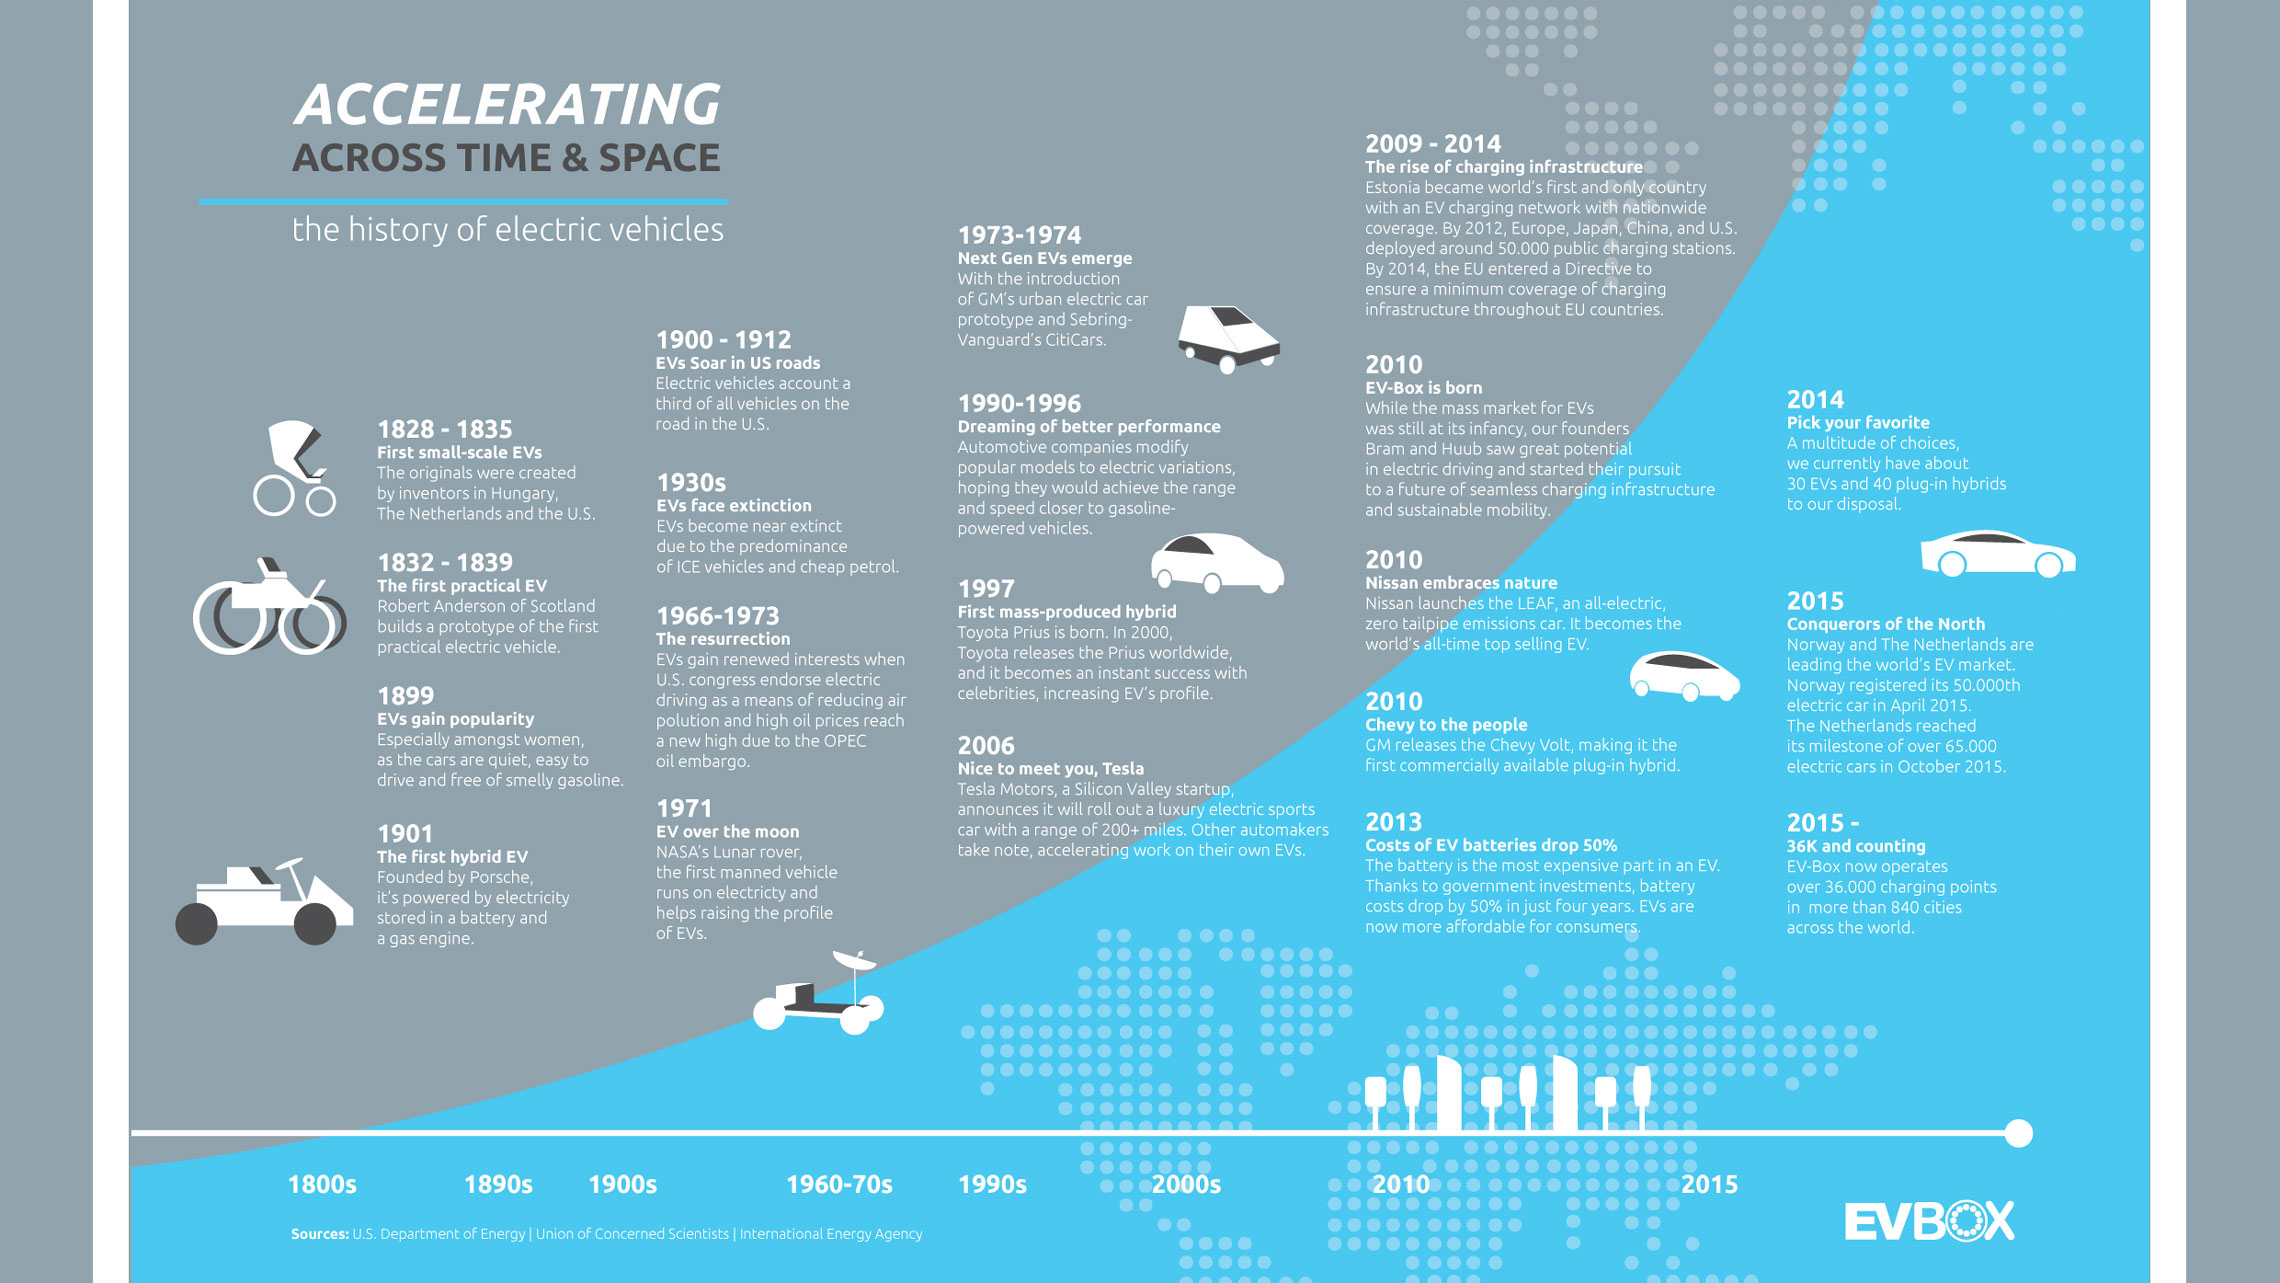

In [2]:
from IPython import display
display.Image("/Users/Harry Patria/Pictures/History EV.jpg")

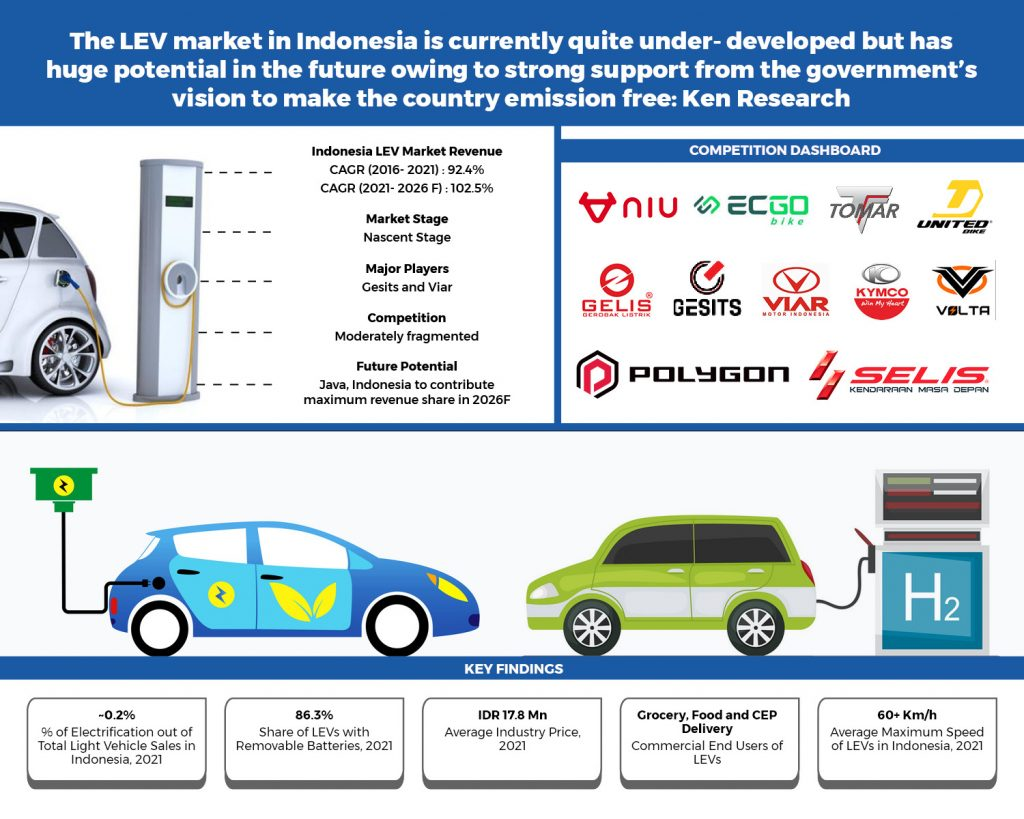

In [3]:
from IPython import display
display.Image("/Users/Harry Patria/Pictures/EV indo profile.jpg")

#### Resilience Framework

For assessing supply chain resilience, a framework by Sprecher et al. (2015) was used. As stated in the 
introduction, resilience refers to the capacity of a supply chain to meet the demand for a certain material. 
A system with high resilience undergoes minimal disturbance or is able to recover from large changes in 
demand or potential supply disruptions in a reasonable time frame. 
Sprecher et al. (2015) describe different types of disturbances, distinguishing between supply 
disturbances and demand disturbances that can be either slow or fast. They also discuss three important 
aspects of resilience; resistance, rapidity and flexibility, as well as mechanisms that can increase 
resilience. 

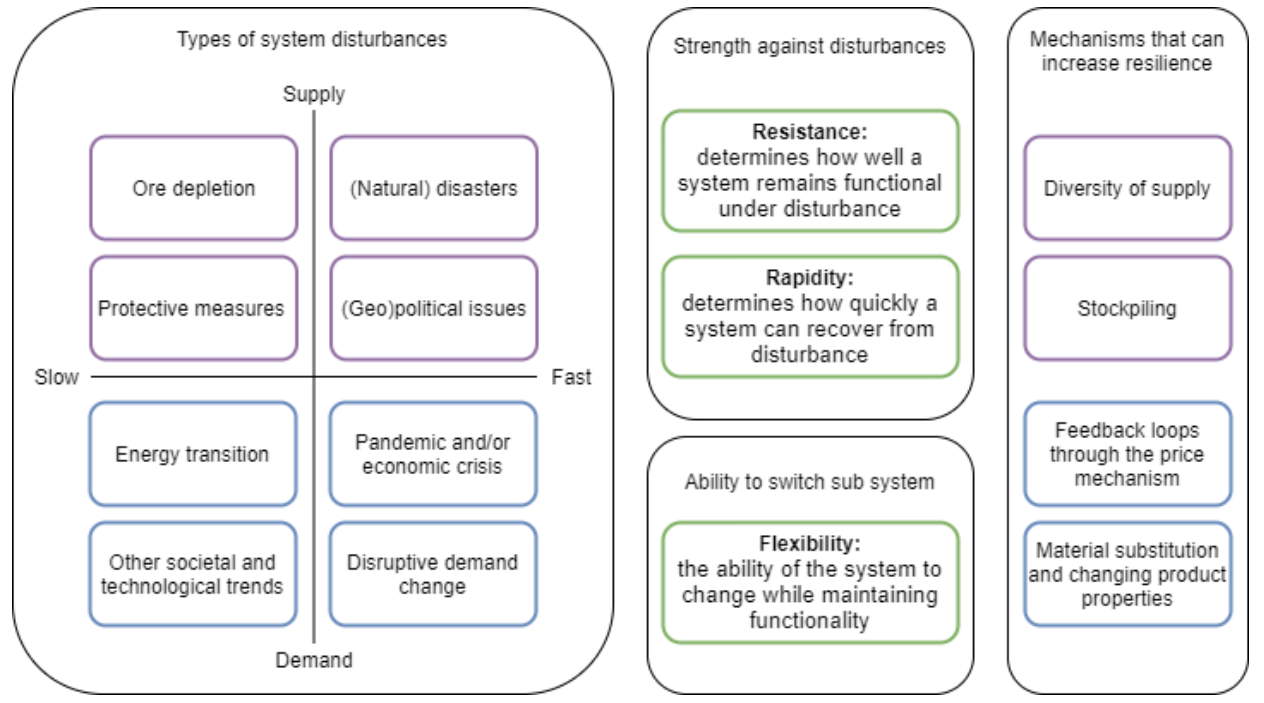

In [87]:
from IPython import display
display.Image("/Users/Harry Patria/Pictures/Nickel System .png")

How may the global nickel supply chain and its externalities develop between 2020 and 2060 under 
different disruption scenarios, sustainability policies and key uncertainties? 

- What is the range of possible nickel demand between 2015 and 2060 based on various energy 
system scenarios for electricity generation, road transport and electricity storage?
- How resilient is the nickel system to changes in demand due to the ET and substitution and 
changes in supply due to resource depletion and disruptions in dominant supplying countries?
- What are the impacts of end of life (EoL) waste management strategies and policies to reduce 
forward supply chain losses and increase EV battery lifetime?
- What are other key uncertainties influencing the development and resilience of the nickel system? 
- How do the results compare to historic developments and other model results in literature? 

In [4]:
#install libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import figure_factory as figfac
from termcolor import colored

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error

#!pip install keras-tuner --upgrade
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

Required libraries were succesfully imported...


<ipython-input-4-1607d7424119>:18: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


In [5]:
df = pd.read_csv("/Users/Harry Patria/Documents/Nickel Prediction/Nickel.csv")

In [6]:
import io
fig = figfac.create_table(df.head(n = 10))
fig.show()
# Dataset is now stored in a Pandas Dataframe

In [79]:
df.describe().style.background_gradient(cmap="YlGnBu")
df.describe().T.style.set_properties(**{"border-radius" : "1.1px", "border": "1.2px solid black","font-size" : "15.5px","border-radius" : "1px"})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3537 non-null   object 
 1   Price   3537 non-null   float64
 2   Open    3537 non-null   float64
 3   High    3537 non-null   float64
 4   Low     3537 non-null   float64
 5   Change  3537 non-null   object 
dtypes: float64(4), object(2)
memory usage: 165.9+ KB


In [ ]:
#from pandas_profiling import ProfileReport
#defining the library
#profile = ProfileReport(df)
# exporting your report as a html file
#profile.to_file(output_file='report.html')

In [20]:
df = df.rename(columns = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low",
                     "Price" : "price", "Change" : "change"}, inplace = False)

print(colored("Column names were succesfully changed...", color = "green", attrs = ["bold", "dark"]))

Column names were succesfully changed...


In [21]:
fig = px.histogram(df, x = "price", y = "open", marginal = "box", text_auto = True, template = "plotly_white", hover_data  = df.columns)
fig.show()

#### Converting to array

In [22]:
data = df.filter(['price'])
dataset = data.values
dataset[0:5]
data.head().style.set_properties(**{"background-color": "#8A2BE2", "font-size" : "17px",
                                    "color": "#FFEBCD", "border-radius" : "1px", "border": "1.5px solid black"})

The number of rows to train the model on

In [23]:
training_data_len = int(np.floor( len(dataset) * .95 ))
print("Training data length: ", training_data_len)

Training data length:  3360


#### Normalization

In [24]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.30915396],
       [0.30153933],
       [0.32143108],
       ...,
       [0.41693025],
       [0.41044024],
       [0.43649399]])

####  Creating training dataset 

In [25]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train, "\n")
        print(y_train)

[array([0.30915396, 0.30153933, 0.32143108, 0.33199784, 0.32485181,
       0.30465547, 0.30676413, 0.29797802, 0.30137532, 0.30020384,
       0.28743469, 0.25988145, 0.25229025, 0.25971744, 0.2430824 ,
       0.25971744, 0.25022844, 0.24886952, 0.24219208, 0.23246878,
       0.23713128, 0.26203697, 0.24601111, 0.24226236, 0.24530822,
       0.27916403, 0.26944073, 0.25960029, 0.24406645, 0.32578899,
       0.31055973, 0.29087885, 0.31325414, 0.30153933, 0.29533047,
       0.27330662, 0.27639933, 0.27963262, 0.27094023, 0.25667159,
       0.26245871, 0.25423491, 0.25411776, 0.25386003, 0.27131511,
       0.24390244, 0.211921  , 0.21679436, 0.22914177, 0.2220426 ,
       0.22187859, 0.21883274, 0.21660692, 0.20231485, 0.18907711,
       0.19153722, 0.17630796, 0.17279351, 0.15287833, 0.15098053])] 

[0.12687144162507905]
[array([0.30915396, 0.30153933, 0.32143108, 0.33199784, 0.32485181,
       0.30465547, 0.30676413, 0.29797802, 0.30137532, 0.30020384,
       0.28743469, 0.25988145, 0.2

#### Convert x_train and y_train to array

In [26]:
x_train = np.array(x_train)
y_train = np.array(y_train)

####  Reshaping the data

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("The shape of x_train set:", x_train.shape)

The shape of x_train set: (3300, 60, 1)


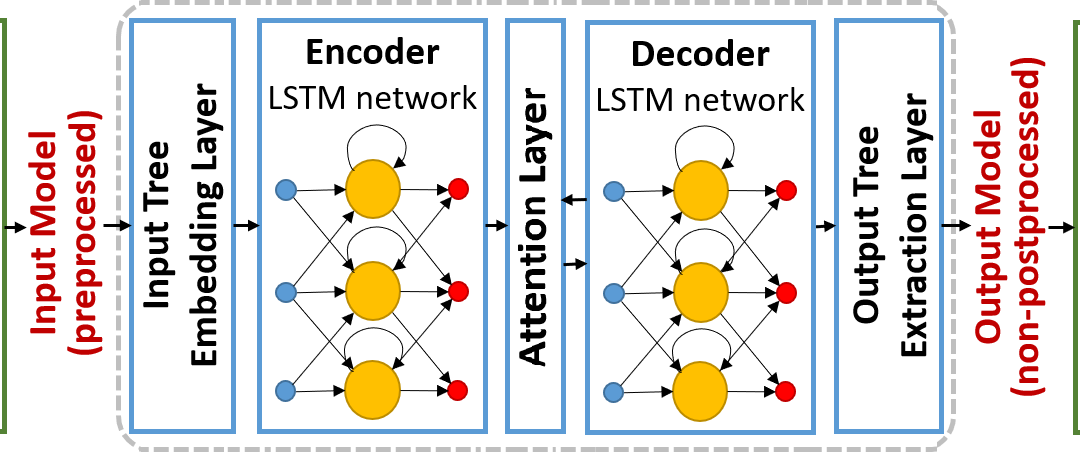

In [1]:
from IPython import display
display.Image("/Users/Harry Patria/Pictures/LSTM.png")

#### LONG SHORT-TERM MEMORY (LSTM) Model

#### Building and training LSTM model 

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
3300/3300 [==============================] - 174s 51ms/step - loss: 5.7520e-04
Epoch 2/5
3300/3300 [==============================] - 169s 51ms/step - loss: 2.9382e-04
Epoch 3/5
3300/3300 [==============================] - 170s 52ms/step - loss: 2.4658e-04
Epoch 4/5
3300/3300 [==============================] - 169s 51ms/step - loss: 2.2660e-04
Epoch 5/5
3300/3300 [==============================] - 130s 39ms/step - loss: 2.0959e-040s - loss


#### Create testing dataset

In [39]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#### Convert test data to array and reshape it

In [40]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#### Get predicted prices

In [41]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

array([[57367.062],
       [54109.023],
       [47434.137],
       [49138.51 ],
       [44730.516],
       [40815.574],
       [35312.92 ],
       [30187.986],
       [27383.008],
       [33275.586]], dtype=float32)

####  Get root mean squared error (RMSE)

In [42]:
d = predictions - y_test
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
#print("MSE:", mse_f)
print("RMSE:", rmse_f)

Results by manual calculation:
MAE: 937.6711136122881
RMSE: 1406.719298159431


#### Plot the data

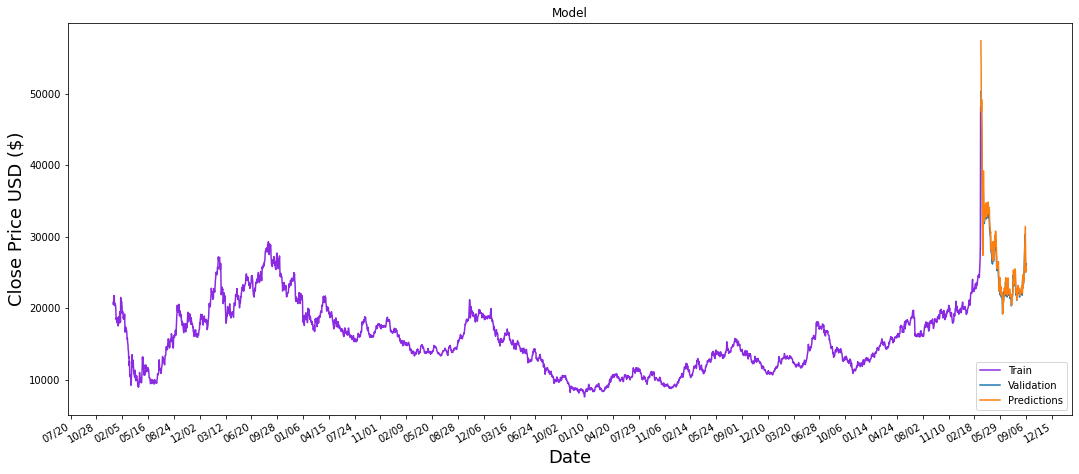

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(18,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['price'], color='#8A2BE2')
#plt.plot(valid[['price', 'Predictions']],color='brown')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(train['price'], color='#8A2BE2')
plt.plot(valid[['price', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.gcf().autofmt_xdate()
plt.show()

#### Show the valid and predicted prices

In [84]:
valid.tail(n = 6)
valid.tail(6).style.set_properties(**{"background-color": "#8A2BE2", "font-size" : "17px",
                                    "color": "#FFEBCD", "border-radius" : "1px", "border": "1.5px solid black"})

#### *Conclusion* 
1. *LSTM provided a robust model to forecast the Nickel price, resulting in relatively lower MSE 
2. *The model forecasting shows the constant increasing price in the future with respect to sort of plausible changes* 

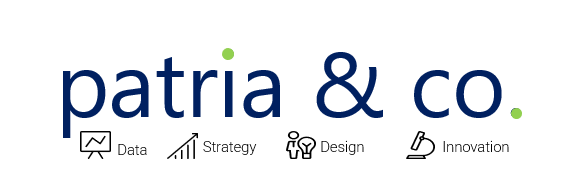

In [37]:
from IPython import display
display.Image("/Users/Harry Patria/Pictures/Logo Patria & Co..png")